In [1]:
import pandas as pd

import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('times__sm.csv')
d = list(pd.read_csv('times__sm.csv')['times__sm'])
df2 = pd.read_csv('times__md.csv')


In [3]:
# !pip install seaborn

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


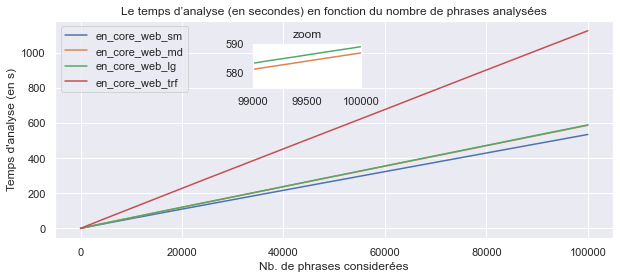

In [93]:
import seaborn as sns
MAX_SENTENCES = 100000
sns.set(rc={'figure.figsize':(10,4)})

files = ('times__sm','times__md','times__lg','times__trf')
def plot_from_csv(args):
    sns.set_theme(style="darkgrid")

    fig, ax = plt.subplots()
    
    for y in args:
        df = pd.read_csv(f'{y}.csv')
        sns.lineplot(x='Unnamed: 0',y=y, label = f'en_core_web{y[6:]}', ax=ax,data=df)

    ax.set_xlabel('Nb. de phrases considerées')
    ax.set_ylabel("Temps d'analyse (en s)")
    ax.set_title("Le temps d’analyse (en secondes) en fonction du nombre de phrases analysées")
    ax2 = plt.axes([0.4, 0.65, .15, .15], facecolor='w')
    for y in args:
        df = pd.read_csv(f'{y}.csv')
        sns.lineplot(x='Unnamed: 0',y=y, ax=ax2,data=df)

    ax2.set_xlabel('')
    ax2.set_ylabel('')
    ax2.set_title('zoom')
    ax2.set_ylim([575,590])
    ax2.set_xlim([99000,100000])
    plt.savefig('plots/times.png')
    plt.savefig('plots/times.eps')
plot_from_csv(files)

100001
100001
100001
100001


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


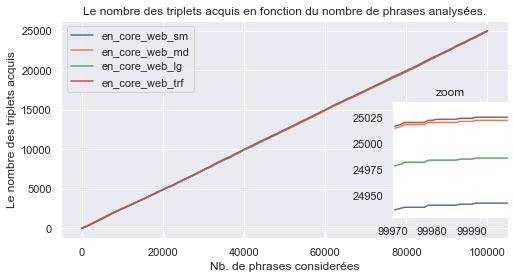

In [118]:
import seaborn as sns
MAX_SENTENCES = 100000
sns.set(rc={'figure.figsize':(8,4)})

files = ('nb_triplet__sm','nb_triplet__md','nb_triplet__lg','nb_triplet__trf')
def plot_from_csv(args):
    sns.set_theme(style="darkgrid")

    fig, ax = plt.subplots()
    
    for y in args:
        df = pd.read_csv(f'{y}_3.csv').reset_index()
        sns.lineplot(x='index',y='nb_triplets', label = f'en_core_web{y[11:]}', ax=ax,data=df)

    ax.set_xlabel('Nb. de phrases considerées')
    ax.set_ylabel("Le nombre des triplets acquis")
    ax.set_title("Le nombre des triplets acquis en fonction du nombre de phrases analysées.")
    ax2 = plt.axes([0.7, 0.2, .2, .4], facecolor='w')
    for y in args:
        df = pd.read_csv(f'{y}_3.csv').reset_index()
        print(len(df))
        sns.lineplot(x='index',y='nb_triplets', ax=ax2,data=df)

    ax2.set_xlabel('')
    ax2.set_ylabel('')
    ax2.set_title('zoom')
    ax2.set_ylim([24930,25040])
    ax2.set_xlim([99970,99999])
    plt.savefig('plots/triplets.png')
    plt.savefig('plots/triplets.eps')
plot_from_csv(files)

In [60]:
# pip install venn

all:  24943
unique:  22653
all:  25022
unique:  22675
all:  24986
unique:  22623
all:  25025
unique:  22556


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

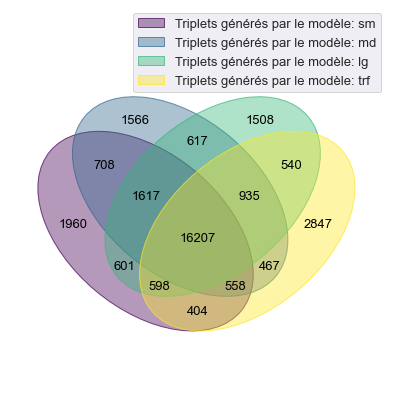

In [111]:
import seaborn as sns
from venn import venn

files = ('all_tuples_sm','all_tuples_md','all_tuples_lg','all_tuples_trf')#,'all_tuples_lg','tuples_trf')
names= ('sm','md','lg','trf')
def plot_from_csv_venn(args):
    # sns.set_theme(style="darkgrid")

    # fig, ax = plt.subplots()
    sets = {}
    for y in args:
        df = pd.read_csv(f'{y}_3.csv')
        print('all: ',len(df))
        tuples = set(zip(df['subject_lemma'],df['verb_lemma'],df['object_lemma']))
        print('unique: ',len(tuples))
        sets.update({f"Triplets générés par le modèle: {names[files.index(y)]}":tuples})
        # df['len tuples'] = tuples
        # sns.lineplot(x='index',y=y, label = f'en_core_web{y[6:]}', ax=ax,data=df)
    # print(sets)
    fig, ax = plt.subplots(1, figsize=(7,7))
    venn(sets, ax=ax)
    
    plt.savefig('plots/tuples4.png',transparent=True)
    plt.savefig('plots/tuples4.eps',transparent=True)
plot_from_csv_venn(files)

In [ ]:
df = pd.read_csv('all_tuples_lg.csv')
for i in df.iterrows():
    print(i[0])


{'man': ['use stapler', 'be action', 'drive it', 'make it', 'have information', 'receive assistance', 'smile other', 'hug other', 'force way', 'become woman', 'hit woman', 'have side', 'shoot another', 'to tower', 'think what', 'be charge', 'make PROPN', 'face PROPN', 'serve percent', 'use gun', 'see opportunity', 'turn tide', 'move equipment', 'hijack helicopter', 'express preference', 'get they', 'have time', 'may reaction', 'kill people', 'have history', 'attack school', 'could more', 'have right', 'to jerk', 'enforce ban', 'enter shop', 'force they', 'have host', 'enter store', 'seek lesson', 'enter branch', 'do chance', 'surround she', 'have reality', 'catch ball', 'put gun', 'tell he', 'have cancer', 'claim responsibility', 'enter home', 'be increase', 'have court', 'videotape woman', 'force she', 'do she', 'to they', 'reject training', 'will kind', 'have family', 'butcher pet', 'eat pet', 'fire round', 'return theater', 'call police', 'point gun', 'subdue gunman', 'sustain traum

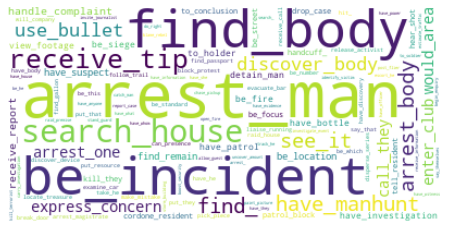

In [48]:
from wordcloud import WordCloud
from collections import Counter

def create_word_cloud(text , figure_name):

    # Create and generate a word cloud image:
    wordcloud = WordCloud(background_color="white").generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig(f"plots/cloud_"+figure_name+".png", format='png')
    plt.savefig(f"plots/cloud_"+figure_name+".eps", format='eps')


def q4():
    # load les triplets md
    # with open('tuples_md.txt', 'r', encoding='utf-8') as f1:
    #     sentences = f1.readlines()
    # f1.close()
    df = pd.read_csv('all_tuples_lg.csv')

    # extract some informations
    infos = {'man': [], 'woman': [], 'teacher': [], 'student': [], 'girl': [], 'boy': [], 'police': []}
    for s in df.itertuples():
        # s = s.replace('(', '').replace(')', '').replace(',', '').replace("'", "").replace('\n', '')
        # print(s)
        if s[1] == 'man':
            infos['man'].append(s[2] + " " + s[3])

        if s[1] == 'woman':
            infos['woman'].append(s[2] + " " + s[3])

        if s[1] == 'teacher':
            infos['teacher'].append(s[2] + " " + s[3])

        if s[1] == 'student':
            infos['student'].append(s[2] + " " + s[3])

        if s[1] == 'girl':
            infos['girl'].append(s[2] + " " + s[3])

        if s[1] == 'boy':
            infos['boy'].append(s[2] + " " + s[3])

        if s[1] == 'police':
            infos['police'].append(s[2] + "_" + s[3]) # police, consider bigrams

    print(infos)
    print('Man:', Counter(infos['man']))
    print('Woman:', Counter(infos['woman']))
    print('teacher:', Counter(infos['teacher']))
    print('Student:', Counter(infos['student']))
    print('Girl:', Counter(infos['girl']))
    print('Boy:', Counter(infos['boy']))
    print('Police:', Counter(infos['police']))

    #### create word clouds

    text_man = " ".join(infos['man']).replace('PROPN', '')  # remove PROPN
    create_word_cloud(text_man, 'man')

    text_woman = " ".join(infos['woman']).replace('PROPN', '')  # remove PROPN
    create_word_cloud(text_woman, 'woman')

    text_teacher = " ".join(infos['teacher']).replace('PROPN', '')  # remove PROPN
    create_word_cloud(text_teacher, 'teacher')

    text_student = " ".join(infos['student']).replace('PROPN', '')  # remove PROPN
    create_word_cloud(text_student, 'student')

    text_girl = " ".join(infos['girl']).replace('PROPN', '')  # remove PROPN
    create_word_cloud(text_girl, 'girl')

    text_boy = " ".join(infos['boy']).replace('PROPN', '')  # remove PROPN
    create_word_cloud(text_boy, 'boy')

    text_police = " ".join(infos['police']).replace('PROPN', '')  # remove PROPN
    print(text_police.__contains__('help'))
    print(text_police.__contains__('rescue'))
    print(text_police.__contains__('first aid'))
    print(text_police.__contains__('CPR'))
    print(text_police.__contains__('suspect'))

    create_word_cloud(text_police, 'police')

q4()

In [8]:
from matplotlib_venn import venn3, venn3_circles
from matplotlib_venn import venn2, venn2_circles
# from matplotlib_venn import venn4, venn4_circles


In [ ]:
# from venn import venn
# sets = {
#     labels[0]: set(d1),
#     labels[1]: set(d2),
#     labels[2]: set(d3),
#     labels[3]: set(d4)
# }
# fig, ax = plt.subplots(1, figsize=(16,12))
# venn(sets, ax=ax)
# plt.legend(labels[:-2], ncol=6)